In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import *
#필요한 텐서플로우 모듈 임폴트

import numpy as np 
import matplotlib.pyplot as plt  
#벡터연산과 그래프 그리기를 위한 맷플롯립 임폴트

plt.style.use('seaborn')
# 맷플롯립 스타일 = 시본 설정

C:\Users\leeky\AppData\Local\Temp\ipykernel_5972\595571914.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
tf.random.set_seed(111)
# 딥러닝 수행 전 텐서플로 난수자원 초기화

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 데이터셋을 불러온 후 최초 훈련과 테스트 셋으로 분류

In [4]:
x_train.shape
# 50000개 훈련데이터

(50000, 32, 32, 3)

In [5]:
x_test.shape
# 10000개의 테스트 데이터

(10000, 32, 32, 3)

In [6]:
y_train.shape
# 50000개 훈련데이터

(50000, 1)

In [7]:
y_test.shape
# 10000개의 테스트 데이터

(10000, 1)

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# 모델의 분류 타겟 = 총 10개
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
print(class_names[y_train[0][0]])

frog


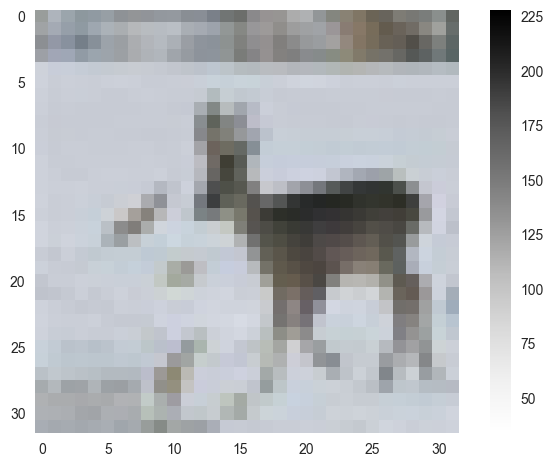

In [10]:
plt.figure()
plt.imshow(x_train[20])
plt.colorbar()
plt.grid(False)
plt.show()

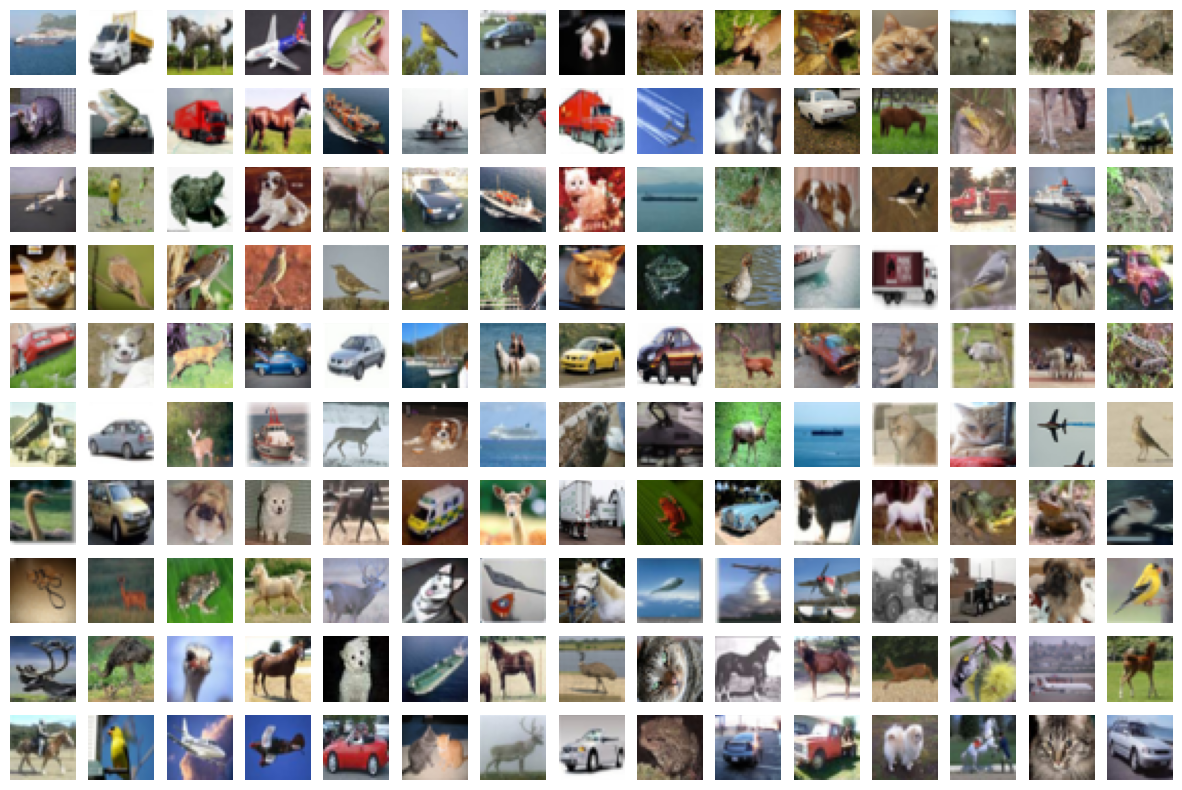

In [11]:
num_samples = 150
random_idx = np.random.randint(50000, size=num_samples)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_idx):
    image = x_train[idx, :]
    label = y_train[idx, :]
    
    plt.subplot(10, 15, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image) 
    plt.grid(False)

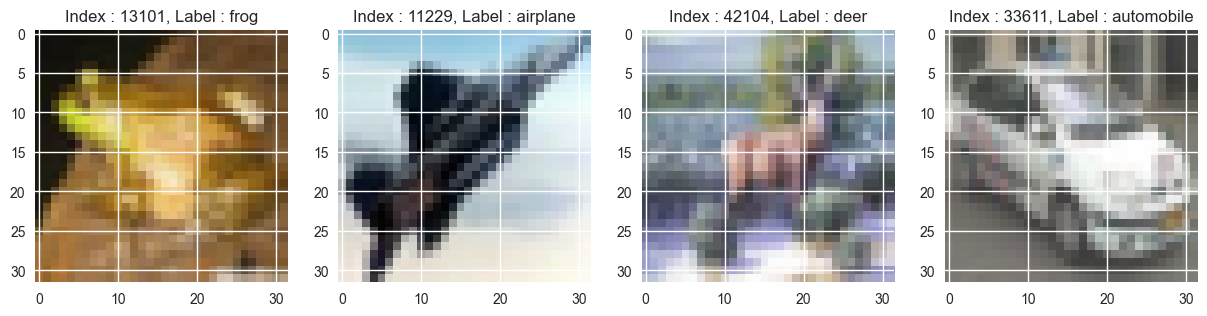

In [12]:
samples = 4

random_index = np.random.randint(50000, size=samples)
# 넘파이 랜덤으로 50000개의 데이터 중 랜덤한 4개 데이터를 추출

plt.figure(figsize=(15, 10)) 
# 그림사이즈 초기화 후,

for i, idx in enumerate(random_index):
    image = x_train[idx, :]
    label = y_train[idx][0] 
    
    plt.subplot(1, len(random_index), i+1)
    plt.imshow(image) 
    plt.title('Index : {}, Label : {}'.format(idx, class_names[label]))
# 서브 플롯을 활용해서 그래프 도시

In [13]:
x_train = x_train / 255.
x_test = x_test / 255. 
#모델 학습 전 데이터를 표준화(학습이 더 잘되게 하기 위해서)

In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 32개 필터, 크기3커널, 패딩 및 스트라이드 기본

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 64개 필터, 크기3커널, 패딩 및 스트라이드 기본


model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 128개 필터, 크기3커널, 패딩 및 스트라이드 기본

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 256개 필터, 크기3커널, 패딩 및 스트라이드 기본

# 완전연결 신경망
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [16]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.3)
# 에폭 100회, 배치사이즈는 128

Epoch 1/30
274/274 [==============================] - 5s 9ms/step - loss: 1.7462 - acc: 0.3619 - val_loss: 3.2431 - val_acc: 0.1390
Epoch 2/30
274/274 [==============================] - 2s 7ms/step - loss: 1.3687 - acc: 0.5068 - val_loss: 1.3954 - val_acc: 0.4960
Epoch 3/30
274/274 [==============================] - 2s 7ms/step - loss: 1.2015 - acc: 0.5748 - val_loss: 1.4205 - val_acc: 0.5455
Epoch 4/30
274/274 [==============================] - 2s 7ms/step - loss: 1.0891 - acc: 0.6177 - val_loss: 1.0166 - val_acc: 0.6370
Epoch 5/30
274/274 [==============================] - 2s 7ms/step - loss: 0.9918 - acc: 0.6529 - val_loss: 0.9492 - val_acc: 0.6621
Epoch 6/30
274/274 [==============================] - 2s 7ms/step - loss: 0.9111 - acc: 0.6837 - val_loss: 0.9844 - val_acc: 0.6642
Epoch 7/30
274/274 [==============================] - 2s 8ms/step - loss: 0.8553 - acc: 0.7014 - val_loss: 0.9420 - val_acc: 0.6783
Epoch 8/30
274/274 [==============================] - 2s 8ms/step - loss: 0.

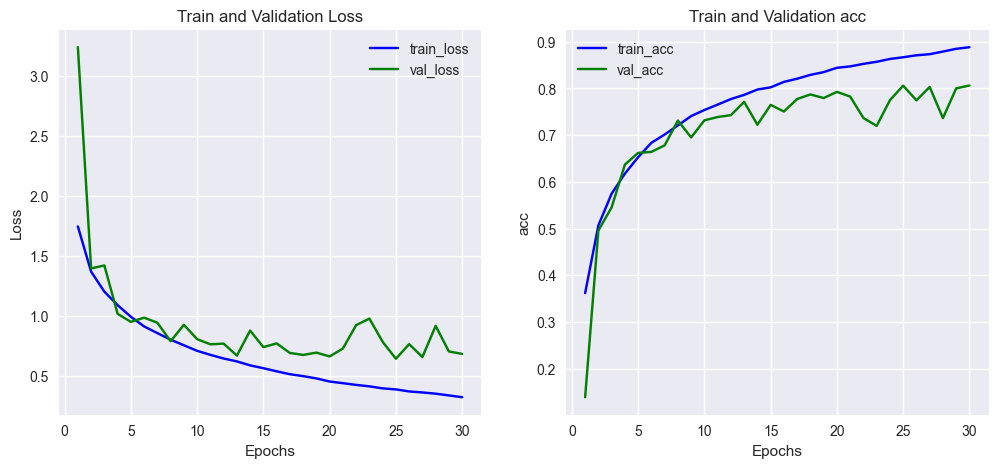

In [27]:
history_dict = history.history 

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color='green', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color='green', label='val_acc')
ax2.set_title('Train and Validation acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('acc')
ax2.grid(True)
ax2.legend()

plt.show()

## 모델 구성간 참고 ##
#1. CNN 층이 얇은 경우, 과적합 발생 / 정확도 하락, 약 51%
#2. 드랍아웃이 없는 경우, 과적합 발생 / 정확도 하락, 약 62%
#3. 충분한 에폭을 가져가는 경우 / 정확도 상승, 약 81%
#4. 배치를 작게하는 경우 / 큰 변화없음
#5. 웹서핑 결과 : 이미지 증식을 활용할 경우, 정확도 더 상승 가능(~약 87%까지)

## 결론적으로 데이터에 가장 잘 맞는 모델과 훈련 메커니즘을 짜야함 ##
## CIFAR10은 32*32*3의 데이터를 훈련시키므로 차원이 MNIST보다 복잡하되, 사이즈가 크지 않은 이미지
## 층을 두텁게 가져가는 가운데, 과대적합을 막기 위한 장치를 설정하여 일반모델 유도가 포인트

In [28]:
model.evaluate(x_test, y_test)
## 모델 정확도 = 약 81%

313/313 [==============================] - 1s 3ms/step - loss: 0.7157 - acc: 0.8013


[0.7156843543052673, 0.8012999892234802]

In [29]:
pred_ys = model.predict(x_test)
np.set_printoptions(precision=7)
print(pred_ys[0])
print(np.argmax(pred_ys[0]))

313/313 [==============================] - 1s 2ms/step
[4.3033613e-04 9.8501034e-05 1.4666907e-03 8.7232721e-01 7.0809771e-04
 1.2231056e-01 3.2285586e-04 2.8450973e-04 1.3173901e-03 7.3386764e-04]
3


Text(0.5, 1.0, 'predicted class : cat')

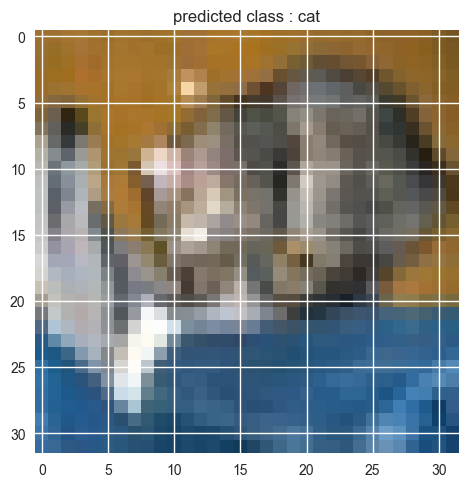

In [30]:
arg_pred_ys = np.argmax(pred_ys, axis=1)

plt.imshow(x_test[0])
plt.title('predicted class : {}'.format(class_names[arg_pred_ys[0]]))

In [31]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(pred_ys)

    if predicted_label == y_test:
        color='blue'
    else:
        color='red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(
        class_names[predicted_label],
        100*np.max(pred_ys),
        class_names[y_test[0]]
    ), color=color)
    

In [32]:
def plot_value_array(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(0, 10))
    thisplot = plt.bar(range(10), pred_ys, color='#777777')
    predicted_label = np.argmax(pred_ys)
    plt.xlabel('Model Prediction')
    plt.grid(False)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')

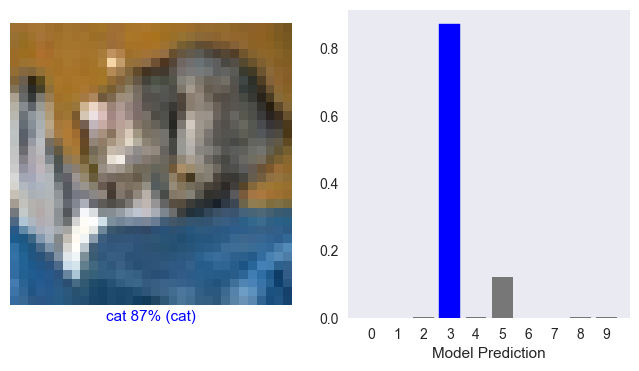

In [33]:
i = 0
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test)
plt.subplot(1, 2, 2)
plot_value_array(i, pred_ys, y_test)
plt.show()

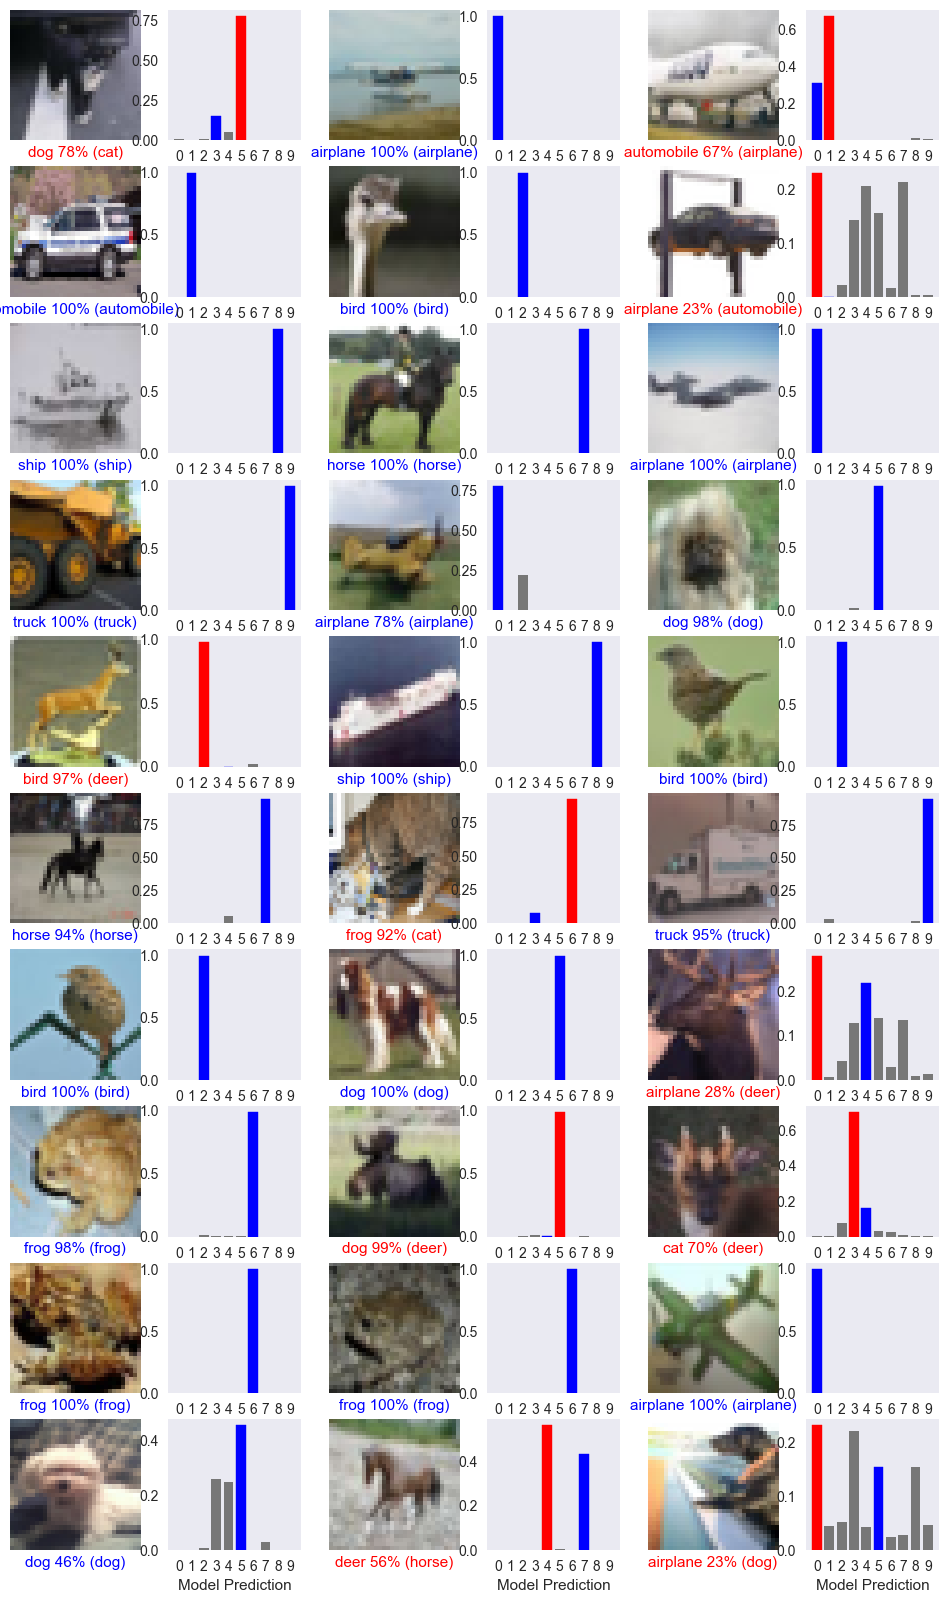

In [34]:
num_rows = 10 
num_cols = 3 

num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2*num_cols, 2*idx+1)
    plot_image(num, pred_ys, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*idx+2)
    plot_value_array(num, pred_ys, y_test)
    

plt.show()

In [35]:
from tensorflow.keras.utils import to_categorical 

y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

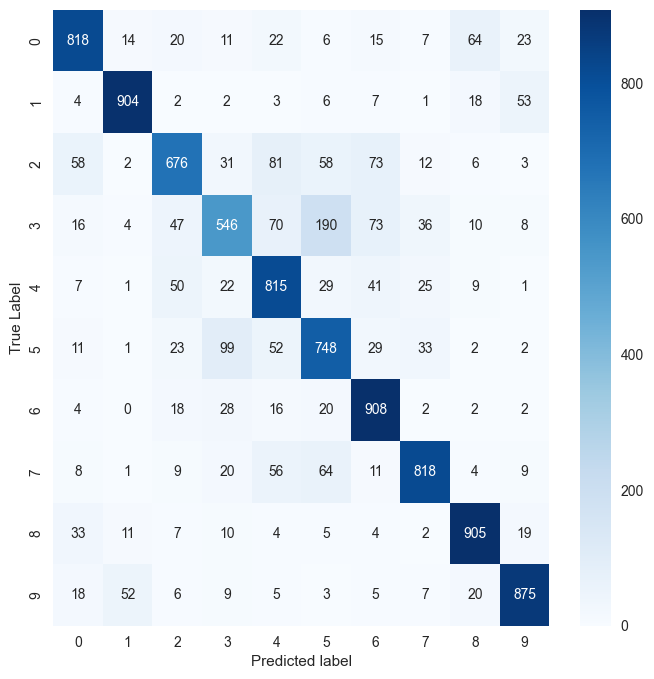

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

plt.figure(figsize=(8, 8))
cm=confusion_matrix(np.argmax(y_test_che, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.show()
